<a href="https://colab.research.google.com/github/JimmyOlsen05/Check-Computer-Performance/blob/master/How%20Various%20Computer%20Metrics%20Affect%20the%20Performance%20of%20Computers%20using%20Multiple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
from sklearn.inspection import partial_dependence
import re
import numpy as np
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [112]:
data=pd.read_csv('/content/sample_data/New_performance_data.csv')

In [ ]:
data.head(2)

In [ ]:
print(data.columns)


In [113]:
# Define extraction functions for disk_io and net_io metrics
def extract_disk_io_metric(row, metric_name):
    pattern = re.compile(rf"{metric_name}_bytes=\d+")
    match = pattern.search(row['disk_io_counters'])
    return int(match.group().split("=")[1]) if match else 0

def extract_net_io_metric(row, metric_name):
    pattern = re.compile(rf"{metric_name}=[\d]+")
    match = pattern.search(row['net_io_counters'])
    return int(match.group().split("=")[1]) if match else 0

In [114]:
# Extract features and add new columns
data['disk_io_read_bytes'] = data.apply(lambda row: extract_disk_io_metric(row, "read"), axis=1)
data['disk_io_write_bytes'] = data.apply(lambda row: extract_disk_io_metric(row, "write"), axis=1)
data['net_io_bytes_sent'] = data.apply(lambda row: extract_net_io_metric(row, "bytes_sent"), axis=1)
data['net_io_bytes_recv'] = data.apply(lambda row: extract_net_io_metric(row, "bytes_recv"), axis=1)

# Drop the original columns
data = data.drop(columns=['disk_io_counters', 'net_io_counters','graphics_name','graphics_DeviceID'])

In [115]:
# Feature scaling (consider for non-normally distributed data)
#scaler = StandardScaler()

#scaler = Normalizer()
scaler = MinMaxScaler()

X = scaler.fit_transform(data[['cpu_percent', 'memory_percent', 'disk_io_read_bytes', 'disk_io_write_bytes', 'net_io_bytes_sent', 'net_io_bytes_recv', 'graphics_ram_size']])
y = data['completion_time']


In [116]:
# Convert scaled features (X) to a DataFrame
X_df = pd.DataFrame(X, columns=['cpu_percent', 'memory_percent', 'disk_io_read_bytes', 'disk_io_write_bytes', 'net_io_bytes_sent', 'net_io_bytes_recv', 'graphics_ram_size'])

data = pd.concat([X_df,y],axis=1)

data


,cpu_percent,memory_percent,disk_io_read_bytes,disk_io_write_bytes,net_io_bytes_sent,net_io_bytes_recv,graphics_ram_size,completion_time
0,0.263858,0.992439,0.014590,0.038298,0.038662,0.066801,0.333333,1.262159
1,0.126386,0.867675,0.229645,0.258039,0.085824,0.025314,0.333333,1.322939
2,0.085366,0.841210,0.010997,0.014841,0.014232,0.009063,0.333333,3.052404
3,1.000000,1.000000,1.000000,1.000000,0.008405,0.004730,0.333333,1.981341
4,0.000000,0.631380,0.002118,0.015536,0.051004,0.042781,0.000000,1.150472
5,0.241685,0.818526,0.017908,0.048331,0.047106,0.068833,0.333333,1.178164
6,0.055432,0.706994,0.000000,0.009960,0.034342,0.036428,0.000000,1.190690
7,0.026608,0.754253,0.124944,0.378973,0.348507,0.206019,0.333333,1.142281
8,0.065410,0.964083,0.151015,0.367559,0.204069,0.075808,0.333333,1.165083
9,0.016630,0.663516,0.017662,0.047823,0.044223,0.068712,0.333333,1.165766


In [117]:
# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Create the linear regression model
model = LinearRegression()



In [119]:
# Fit the model to the training data
model.fit(X_train, y_train)



LinearRegression()

In [124]:
# Make predictions on the test data
y_predicted = model.predict(X_test)

# Evaluate the model performance using R-squared
r2 = r2_score(y_test, y_predicted)
print("R-squared:", r2)

# Print the coefficients of the model
print("Coefficients:", model.coef_)

# Print the intercept of the model
print("Intercept:", model.intercept_)

R-squared: -60.74417983795492
Coefficients: [-2.13614608  1.84370232  5.22062382 -3.47105452 -1.13076328  3.62597393
  1.7298025 ]
Intercept: -0.07759363222339921


In [125]:
model.coef_.dtype
#Remove the completion time coefficent from the Array
#coefficients = np.delete(coefficients, -1)
model.coef_

array([-2.13614608,  1.84370232,  5.22062382, -3.47105452, -1.13076328,
        3.62597393,  1.7298025 ])

In [ ]:
# Feature Importance

coefficients = model.coef_
feature_names = list(data.columns)[:-1]  # Exclude the dependent variable column

#Sort coefficients by their absolute values in descending order
sorted_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print the importance of each feature
for name, importance in sorted_importance:
    print(f"Feature: {name}, Importance: {importance:.2f}")  # Format importance to 2 decimal places


In [136]:
feature_names

['cpu_percent',
 'memory_percent',
 'disk_io_read_bytes',
 'disk_io_write_bytes',
 'net_io_bytes_sent',
 'net_io_bytes_recv',
 'graphics_ram_size']

<Axes: >

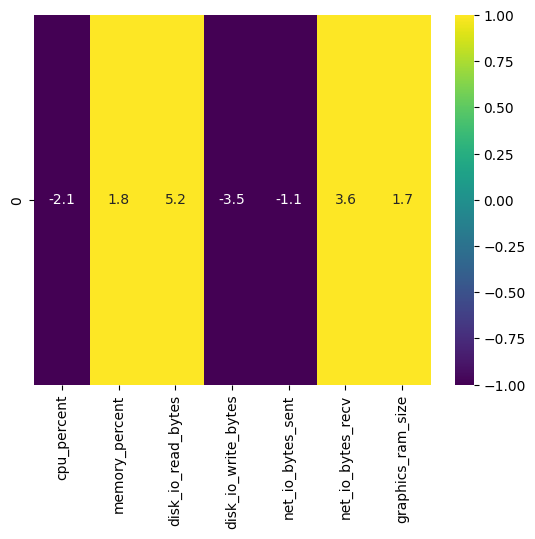

In [135]:
sns.heatmap(coefficients.reshape(1,-1),xticklabels=feature_names,cmap='viridis',vmin=-1,vmax=1,annot=True)

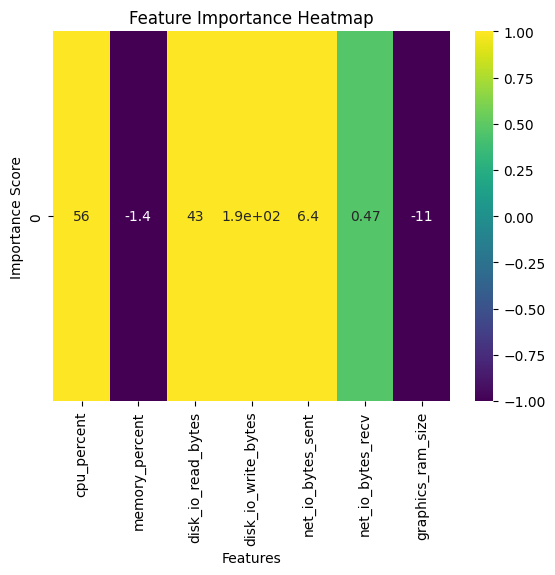

In [130]:


# Assuming you have a trained model and features

importance_matrix = permutation_importance(model, X_test, y_test, n_repeats=10)  # Adjust n_repeats if needed

# Create a heatmap (adjust based on your feature names)
feature_cols = list(data.columns)[:-1]  # Exclude dependent variable column
sns.heatmap(importance_matrix.importances_mean.reshape(1, -1), xticklabels=feature_cols, cmap="viridis",vmax=1,vmin=-1,annot=True)

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance Heatmap")
plt.show()


In [ ]:
# Data analysis
print(data.info())
print(data.describe())

# Pairplot for visualization
sns.pairplot(data, vars=['cpu_percent', 'memory_percent', 'graphics_ram_size', 'disk_io_read_bytes', 'disk_io_write_bytes', 'net_io_bytes_sent', 'net_io_bytes_recv', 'completion_time'])
plt.show()
